# Proyecto 4: Expresiones regulares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import shutil
import string

## Leer y guardar todos los archivos

Primero descomprimiremos el archivo zip que tiene los archivos csv

Utilizando la libreia shutil

shutil.unpack_archive('socialnetworks.zip', 'socialnetworks')

Lo que hicimos fue descomprimir el archivo con el nombre de socialnetworks y posteriormente analizar que archivos cumplen con el patron para identificar aquellos que tengan en el nombre un mes, y aquellos que no

In [2]:
ruta_zip = 'socialnetworks.zip'
ruta_destino = '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2'
shutil.unpack_archive(ruta_zip,ruta_destino)
patron = r'2022'
archivos_econtrados_mes = []
archivos_econtrados_sin_mes = []

Ahora lo que haremos, sera recorrer los archivos que descomprimimos y buscamos los que tengan el año 2022

In [3]:
# Recoreremos cada carpeta

for carpeta, subcarpetas, archivos in os.walk(ruta_destino):
    for archivo in archivos:
        ruta_completa = os.path.join(carpeta, archivo)
        
        if archivo.endswith('.csv'):
            # Verificar si el archivo tiene una fecha en su nombre
            fecha_encontrada = re.search(patron, archivo)
            
            if fecha_encontrada:
                archivos_econtrados_mes.append(ruta_completa)
            else:
                archivos_econtrados_sin_mes.append(ruta_completa)

In [4]:
len(archivos_econtrados_mes)

12

In [5]:
len(archivos_econtrados_sin_mes)
archivos_econtrados_sin_mes

['/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - youtube.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - instagram.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - tiktok.csv']

Ya que tenemos los archivos separados en un arreglo, los podemos abrir en los dataframes que nos piden

In [6]:
Instagram = []
Patron_Insta = r'INSTAGRAM|instagram|Instagram'

Tik_tok = []
Patron_Tik_tok = r'TIKTOK|tiktok|Tiktok'

Youtube = []
Patron_Youtube = r'Youtube|youtube|YOUTUBE'

In [7]:
# Haremos una funcion que encuentre los patrones que le pasemos en unn arreglo
# Y los guarde en cierto arreglo, para que sea mas facil hacer los dataframes

def patrones(arreglo, patron, arreglo_para_guardar):
    for i in arreglo:
        r = re.search(patron, i)
        if r:
            arreglo_para_guardar.append(i)

In [8]:
patrones(archivos_econtrados_mes, Patron_Insta, Instagram)
patrones(archivos_econtrados_mes, Patron_Tik_tok, Tik_tok)
patrones(archivos_econtrados_mes, Patron_Youtube, Youtube)

## Archivos sin mes (Resumen de cada red social)

Ya que tenemos todos los archivos de las redes sociales por separado, abriremos los dataframes que no tienen fecha

In [13]:
df_Insta_s_f = pd.read_csv(archivos_econtrados_sin_mes[0])
df_Tik_tok_s_f = pd.read_csv(archivos_econtrados_sin_mes[2])
df_Youtube_s_f = pd.read_csv(archivos_econtrados_sin_mes[1])

In [10]:
df_Insta_s_f.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [11]:
df_Tik_tok_s_f.head()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K


In [12]:
df_Youtube_s_f.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


## Archivos con mes

Ahora, como se solicita que los archivos cuyo nombre tenga un mes, tambien tengan una columna que lo indique, se le agregará a cada uno

### Instagram

In [13]:
Instagram

['/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-instagram - -nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-instagram june 2022 - june 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-INSTAGRAM - -DEC 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - instagram sep-2022.csv']

In [14]:
# Archivo de Instagram - noviembre
df_I_Nov = pd.read_csv(Instagram[0])
df_I_Nov['Month'] = 'November'
df_I_Nov.head(2)

,s.no,Name,Instagram Name,Category-1,Followers,\nCountry,Eng. (Auth.),Eng. (Avg.),Category-2,Month
0,1,cristiano,Cristiano Ronaldo,Sports with a ball,483.1M,India,4.5M,5.6M,NaN,November
1,2,kyliejenner,Kylie 🤍,Fashion,370M,United States,2.8M,4.4M,Modeling,November


In [15]:
# Archivo de Instagram - junio
df_I_June = pd.read_csv(Instagram[1])
df_I_June['Month'] = 'June'
df_I_June.head(2)

,instagram name,influencer name,Category_1,Category_2,Subscribers count,Views avg.,Likes avg,Comments avg.,Month
0,433,433,Sports with a ball,NaN,50.7M,Spain,274.9K,456.7K,June
1,____kimwoobin,김우빈,Lifestyle,NaN,3.6M,Indonesia,449.4K,592.7K,June


In [16]:
# Archivo de Instagram - diciembre
df_I_Dec = pd.read_csv(Instagram[2])
df_I_Dec['Month'] = 'December'
df_I_Dec.head(2)

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.),Month
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December


In [17]:
# Archivo de Instagram - septiembre
df_I_Sep = pd.read_csv(Instagram[3])
df_I_Sep['Month'] = 'September'
df_I_Sep.head(2)

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement\n,Engagement average\r\n,Category_1,Category_2,Month
0,1,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN,September
1,2,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling,September


Una vez que cada DataFrame contiene los meses, se concatenan en uno solo y se limpia

In [18]:
# Concatenar los DataFrames de Instagram en un solo DataFrame
df_Insta = pd.concat([df_I_June, df_I_Sep, df_I_Nov, df_I_Dec], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Insta.head()

,instagram name,influencer name,Category_1,Category_2,Subscribers count,Views avg.,Likes avg,Comments avg.,Month,S.no,...,Category-1,Followers,\nCountry,Eng. (Auth.),Eng. (Avg.),Category-2,Rank,name,followers,country
0,433,433,Sports with a ball,NaN,50.7M,Spain,274.9K,456.7K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,____kimwoobin,김우빈,Lifestyle,NaN,3.6M,Indonesia,449.4K,592.7K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,__youngbae__,TAEYANG,Music,NaN,13.4M,Indonesia,269.6K,304.1K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.6M,Russia,164.4K,189.4K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_hakkencoser_,Hakken 八犬,Lifestyle,Photography,3.5M,United States,525.1K,643K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Limpieza del DataFrame de Instagram
    # Combinar las columnas que se refieren a la misma información y eliminar las que ya no se necesitan
#Username
df_Insta['Username'] = df_Insta['Instagram Name'].combine_first(df_Insta['instagram name']).combine_first(df_Insta['Instagram name'])
df_Insta = df_Insta.drop(['Instagram Name','instagram name','Instagram name'], axis=1)
#Name
df_Insta['Name'] = df_Insta['Name'].combine_first(df_Insta['influencer name ']).combine_first(df_Insta['name']).combine_first(df_Insta[' Name'])
df_Insta = df_Insta.drop(['influencer name ','name',' Name'], axis=1)
#Subscribers o Followers
df_Insta['Subscribers o Followers'] = df_Insta['Subscribers'].combine_first(df_Insta['Subscribers count']).combine_first(df_Insta['followers']).combine_first(df_Insta['Followers'])
df_Insta = df_Insta.drop(['Subscribers','Subscribers count','followers','Followers'], axis=1)
#Country
df_Insta['Country'] = df_Insta['Audience country'].combine_first(df_Insta['Views avg.']).combine_first(df_Insta['country']).combine_first(df_Insta['\nCountry'])
df_Insta = df_Insta.drop(['Audience country','Views avg.','country','\nCountry'], axis=1)
#Authentic
df_Insta['Authentic'] = df_Insta['Authentic engagement\n'].combine_first(df_Insta['Eng. (Auth.)']).combine_first(df_Insta['Likes avg'])
df_Insta = df_Insta.drop(['Authentic engagement\n','Eng. (Auth.)','Likes avg'], axis=1)
#Engagement
df_Insta['Engagement'] = df_Insta['Engagement average\r\n'].combine_first(df_Insta['Eng. (Avg.)']).combine_first(df_Insta['Comments avg.'])
df_Insta = df_Insta.drop(['Engagement average\r\n','Eng. (Avg.)','Comments avg.'], axis=1)
#Category1
df_Insta['Category1'] = df_Insta['Category-1'].combine_first(df_Insta['Category_1'])
df_Insta = df_Insta.drop(['Category-1','Category_1'], axis=1)
#Category2
df_Insta['Category2'] = df_Insta['Category-2'].combine_first(df_Insta['Category_2'])
df_Insta = df_Insta.drop(['Category-2','Category_2'], axis=1)
#Borrar datos inecesarios
df_Insta = df_Insta.drop(['s.no','S.no','Rank'], axis=1)

In [20]:
# Verificar el DataFrame de Instagram resultante
df_Insta

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
0,June,433,433,50.7M,Spain,274.9K,456.7K,Sports with a ball,NaN
1,June,김우빈,____kimwoobin,3.6M,Indonesia,449.4K,592.7K,Lifestyle,NaN
2,June,TAEYANG,__youngbae__,13.4M,Indonesia,269.6K,304.1K,Music,NaN
3,June,НАСТЯ ИВЛЕЕВА,_agentgirl_,18.6M,Russia,164.4K,189.4K,Shows,NaN
4,June,Hakken 八犬,_hakkencoser_,3.5M,United States,525.1K,643K,Lifestyle,Photography
...,...,...,...,...,...,...,...,...,...
4067,December,thiago6,Thiago Alcantara,10.4M,United Kingdom,129.9K,222.7K,Sports with a ball,NaN
4068,December,soycintiacossio,Cintia Cossio,6M,Colombia,313.4K,390.6K,Modeling,Adult content
4069,December,feat.dino,이찬,2.7M,South Korea,716.6K,876.4K,Lifestyle,NaN
4070,December,djokernole,Novak Djokovic,11.8M,United States,158.6K,197.5K,Sports with a ball,NaN


In [21]:
df_Insta.isna().sum()

Month                         0
Name                         47
Username                     41
Subscribers o Followers       0
Country                       9
Authentic                     0
Engagement                   16
Category1                   441
Category2                  2852
dtype: int64

In [22]:
df_Insta = df_Insta.drop_duplicates()

In [23]:
df_Insta=df_Insta.dropna()

In [24]:
df_Insta.shape

(1168, 9)

Se realizan los mismos pasos anteriores para los otros dos DataFrames de TikTok y Youtube

### TikTok

In [25]:
Tik_tok

['/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-tiktok - ---nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - Tiktok sep 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-tiktok june 2022 - june 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-TIKTOK - ---DEC 2022.csv']

In [26]:
#ARCHIVO DE NOVIEMBRE
df_T_Nov = pd.read_csv(Tik_tok[0])
df_T_Nov['Month'] = 'November'
df_T_Nov.drop(['row-cell'], axis=1, inplace=True)
df_T_Nov.head(2)

,Tiktoker name,Tiktok name,\nFollowers,Views (Avg.),Likes (Avg.),Comments (Avg.),Shares (Avg.),Month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,November
1,yossikramer,Yossi,145.6K,26.8M,2.2M,30.1K,71.2K,November


In [27]:
# ARCHIVO DE SEPTIEMBRE
df_T_Sep = pd.read_csv(Tik_tok[1])
df_T_Sep['Month'] = 'September'
df_T_Sep.drop(['S.no'], axis=1, inplace=True)
df_T_Sep.head(2)

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Month
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September
1,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,September


In [28]:
# ARCHIVO DE JUNIO
df_T_June = pd.read_csv(Tik_tok[2])
df_T_June['Month'] = 'June'
df_T_June.head(2)

,Tiktoker,influencer name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,Month
0,___nicoichi___,NICO【平成フラミンゴ】,1.3M,1.9M,225.3K,1.7K,1.1K,June
1,_.anime.edits_0,video,97K,1.7M,75.6K,1.5K,8.7K,June


In [29]:
# ARCHIVO DE DICIEMBRE 
df_T_Dic = pd.read_csv(Tik_tok[3])
df_T_Dic['Month'] = 'December'
df_T_Dic.drop(['Rank'], axis=1, inplace=True)
df_T_Dic.head(2)

,Tiktoker name,Tiktok name,followers,views(avg),likes(avg.),comments(avg.),shares(avg.),Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December


In [30]:
# Concatenar los DataFrames de TikTok en un solo DataFrame
df_Tik_tok = pd.concat([df_T_Sep, df_T_Dic, df_T_Nov, df_T_June], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Tik_tok.head()

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Month,followers,views(avg),...,\nFollowers,Views (Avg.),Likes (Avg.),Comments (Avg.),Shares (Avg.),Tiktoker,influencer name,Subscribers count,Likes avg,Shares avg
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Limpieza del DataFrame de Tiktok

#Username
df_Tik_tok['Username']=df_Tik_tok['Tiktoker name'].combine_first(df_Tik_tok['Tiktoker'])
df_Tik_tok.drop(['Tiktoker name', 'Tiktoker'], axis=1, inplace=True)

In [32]:
#Name
df_Tik_tok['Name']=df_Tik_tok['Tiktok name']
df_Tik_tok.drop(['Tiktok name'], axis=1, inplace=True)

In [33]:
df_Tik_tok['Name'] = df_Tik_tok['Name'].combine_first(df_Tik_tok['influencer name'])
df_Tik_tok.drop(['influencer name'], axis=1, inplace=True)

In [34]:
#Folowers o Suscribers
df_Tik_tok['Folowers o Suscribers'] = df_Tik_tok['Subscribers'].combine_first(df_Tik_tok['followers']).combine_first(df_Tik_tok['\nFollowers']).combine_first(df_Tik_tok['Subscribers count'])
df_Tik_tok.drop(['Subscribers', 'followers', '\nFollowers', 'Subscribers count'],axis=1, inplace=True)

In [35]:
#Likes
df_Tik_tok['Likes'] = df_Tik_tok['Likes (Avg.)'].combine_first(df_Tik_tok['Likes avg']).combine_first(df_Tik_tok['Likes avg.']).combine_first(df_Tik_tok['likes(avg.)'])
df_Tik_tok.drop(['Likes (Avg.)', 'Likes avg', 'Likes avg.', 'likes(avg.)'],axis=1,inplace=True)

In [36]:
#Views
df_Tik_tok['Views'] = df_Tik_tok['Views (Avg.)'].combine_first(df_Tik_tok['Views avg.']).combine_first(df_Tik_tok['views(avg)'])
df_Tik_tok.drop(['Views (Avg.)', 'Views avg.', 'views(avg)'], axis=1, inplace=True)

In [37]:
#Shares
df_Tik_tok['Shares'] = df_Tik_tok['Shares (Avg.)'].combine_first(df_Tik_tok['Shares avg']).combine_first(df_Tik_tok['Shares avg.']).combine_first(df_Tik_tok['shares(avg.)'])
df_Tik_tok.drop(['Shares (Avg.)', 'Shares avg', 'Shares avg.', 'shares(avg.)'], axis=1, inplace=True)

In [38]:
#Comments
df_Tik_tok['Comments'] = df_Tik_tok['Comments (Avg.)'].combine_first(df_Tik_tok['Comments avg.']).combine_first(df_Tik_tok['comments(avg.)'])
df_Tik_tok.drop(['Comments (Avg.)', 'Comments avg.', 'comments(avg.)'], axis=1, inplace=True)

In [39]:
# # Verificar el DataFrame de TikTok resultante
df_Tik_tok.head()

,Month,Username,Name,Folowers o Suscribers,Likes,Views,Shares,Comments
0,September,jypestraykids,Stray Kids,13.8M,2.3M,6.4M,34.2K,50.2K
1,September,khaby.lame,Khabane lame,149.2M,2.3M,17.3M,8.7K,15.2K
2,September,scarlettsspam2,scarlett,2.1M,845.8K,17.9M,6.3K,53.9K
3,September,addisonre,Addison Rae,88.7M,906.6K,22M,26.2K,7.6K
4,September,belindatok,Belinda,4.8M,1.5M,14.2M,15.3K,14.5K


In [40]:
df_Tik_tok.isna().sum()

Month                    0
Username                 1
Name                     4
Folowers o Suscribers    1
Likes                    1
Views                    1
Shares                   1
Comments                 1
dtype: int64

In [41]:
df_Tik_tok.drop_duplicates()

,Month,Username,Name,Folowers o Suscribers,Likes,Views,Shares,Comments
0,September,jypestraykids,Stray Kids,13.8M,2.3M,6.4M,34.2K,50.2K
1,September,khaby.lame,Khabane lame,149.2M,2.3M,17.3M,8.7K,15.2K
2,September,scarlettsspam2,scarlett,2.1M,845.8K,17.9M,6.3K,53.9K
3,September,addisonre,Addison Rae,88.7M,906.6K,22M,26.2K,7.6K
4,September,belindatok,Belinda,4.8M,1.5M,14.2M,15.3K,14.5K
...,...,...,...,...,...,...,...,...
4003,June,zeth,Zeth,12.5M,1.3M,6.7M,7.7K,3K
4004,June,zodiac.boyfriend,Zodiac Boyfriend🪐🔮,1.8M,272.7K,1.9M,3.6K,6.8K
4005,June,zowloficial,Lord Zowl,1.1M,178.1K,1.4M,2.1K,1.4K
4006,June,zrt.foot,ZR7,100.8K,218K,2.3M,6.4K,1.7K


In [42]:
df_Tik_tok=df_Tik_tok.dropna()

In [43]:
df_Tik_tok = df_Tik_tok.drop_duplicates()

In [44]:
df_Tik_tok.shape

(3972, 8)

### Youtube

In [9]:
Youtube

['/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-youtube june 2022 - june 2022.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-youtube - --nov 2022.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-YOUTUBE - --DEC 2022.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - Youtube sep-2022.csv']

In [10]:
# Archivo de Youtube - diciembre
df_Y_Dec = pd.read_csv(Youtube[0])
df_Y_Dec['Month'] = 'December'
df_Y_Dec.head(2)

,channel name,youTuber,Category,Category_2,Subscribers count,Country,Views avg.,Likes avg,Comments avg.,Month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',December
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',December


In [11]:
# Archivo de Youtube - noviembre
df_Y_Nov = pd.read_csv(Youtube[1])
df_Y_Nov['Month'] = 'November'
df_Y_Nov.head(2)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,November
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,November


In [12]:
# Archivo de Youtube - septiembre
df_Y_Sep = pd.read_csv(Youtube[2])
df_Y_Sep['Month'] = 'September'
df_Y_Sep.head(2)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,September
1,2,setindia,SET India,NaN,147.2M,India,0,0,0,NaN,September


In [13]:
# Archivo de Youtube - junio
df_Y_June = pd.read_csv(Youtube[3])
df_Y_June['Month'] = 'June'
df_Y_June.head(2)

,S.no,Name,Youtuber,Country,Subscribers,Category_2,Avg. views\r\n,Avg. likes,Avg Comments,Category_3,Month
0,1,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,June
1,2,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,June


In [14]:
# Concatenar los DataFrames de Youtube en un solo DataFrame
df_Youtube = pd.concat([df_Y_June, df_Y_Sep, df_Y_Nov, df_Y_Dec], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Youtube.head()

,S.no,Name,Youtuber,Country,Subscribers,Category_2,Avg. views\r\n,Avg. likes,Avg Comments,Category_3,...,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,channel name,youTuber,Subscribers count,Views avg.,Likes avg,Comments avg.
0,1.0,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,PewDiePie,PewDiePie,United States,111.6M,Animation,1.9M,130.5K,7.4K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,✿ Kids Diana Show,✿ Kids Diana Show,NaN,100.5M,Animation,6.9M,34.8K,0,Toys,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Limpieza de YouTube

# Username
df_Youtube['Username'] = df_Youtube['Youtuber'].combine_first(df_Youtube['channel name']).combine_first(df_Youtube['Youtube channel'])

In [16]:
df_Youtube.drop(['Youtuber', 'channel name','Youtube channel'],axis=1,inplace=True)

In [17]:
# Name
df_Youtube['Name'] = df_Youtube['Name'].combine_first(df_Youtube['youTuber']).combine_first(df_Youtube['youtuber name'])

In [18]:
df_Youtube.drop(['youTuber','youtuber name'],axis=1,inplace=True)

In [19]:
# Subscribers
df_Youtube['Subscribers'] = df_Youtube[' Subscribers'].combine_first(df_Youtube['Followers']).combine_first(df_Youtube['Subscribers count'])

In [20]:
df_Youtube.drop([' Subscribers', 'Followers', 'Subscribers count'],axis=1,inplace=True)

In [21]:
# Views
df_Youtube['Views'] = df_Youtube['Avg. views\r\n'].combine_first(df_Youtube['\nViews (Avg.)']).combine_first(df_Youtube['Views avg.'])

In [22]:
df_Youtube.drop(['Avg. views\r\n', '\nViews (Avg.)', 'Views avg.'],axis=1,inplace=True)

In [23]:
# Likes
df_Youtube['Likes'] = df_Youtube['Avg. likes'].combine_first(df_Youtube['Likes (Avg.)']).combine_first(df_Youtube['Likes avg'])

In [24]:
df_Youtube.drop(['Avg. likes', 'Likes (Avg.)', 'Likes avg'],axis=1,inplace=True)

In [25]:
# Comments
df_Youtube['Comments'] = df_Youtube['Avg Comments'].combine_first(df_Youtube['Comments (Avg.)']).combine_first(df_Youtube['Comments avg.'])

In [26]:
df_Youtube.drop(['Avg Comments', 'Comments (Avg.)', 'Comments avg.'],axis=1,inplace=True)

In [27]:
# Category1
df_Youtube['Category1'] = df_Youtube['Category'].combine_first(df_Youtube['Category_3'])

In [28]:
df_Youtube.drop(['Category', 'Category_3'],axis=1,inplace=True)

In [29]:
# Category2
df_Youtube['Category2'] = df_Youtube['Category_2'].combine_first(df_Youtube['Category-2'])

In [30]:
df_Youtube.drop(['Category_2', 'Category-2'],axis=1,inplace=True)

In [31]:
# Eliminacion de columnas que no queremos
df_Youtube.drop(['s.no', 'S.no'],axis=1,inplace=True)

In [32]:
df_Youtube

,Name,Country,Month,Username,Subscribers,Views,Likes,Comments,Category1,Category2
0,T-Series,India,June,tseries,224.4M,141.5K,4.6K,125,NaN,Music & Dance
1,Cocomelon - Nursery Rhymes,NaN,June,checkgate,142.5M,12.5M,64.8K,0,NaN,Education
2,PewDiePie,United States,June,PewDiePie,111.6M,1.9M,130.5K,7.4K,NaN,Animation
3,MrBeast,United States,June,MrBeast6000,104.1M,44.8M,2.2M,70.9K,Humor,Video games
4,✿ Kids Diana Show,NaN,June,✿ Kids Diana Show,100.5M,6.9M,34.8K,0,Toys,Animation
...,...,...,...,...,...,...,...,...,...,...
4066,Power Vision,United States,December,Power Vision,9.5M,137.3K,1.3K,39,NaN,NaN
4067,POPS MUSIC,United States,December,POPSVIETNAM,9.5M,4.6K,144,5,Music & Dance,NaN
4068,Niki and Gabi,United States,December,Niki and Gabi,9.5M,387.6K,17.8K,516,Fashion,Humor
4069,Corridor,United States,December,Corridor,9.5M,1.9M,141.6K,4.7K,Animation,NaN


In [33]:
df_Youtube.isna().sum()

Name              0
Country         527
Month             0
Username          0
Subscribers       0
Views             0
Likes             0
Comments          0
Category1      1656
Category2      2555
dtype: int64

In [34]:
# Seguimos con la limpieza...
df_Youtube=df_Youtube.dropna()

In [35]:
df_Youtube = df_Youtube.drop_duplicates()

In [36]:
df_Youtube.shape

(858, 10)

## Obtención de datos de Instagram

Lo primero es obtener el número total de cuentas (Username) distintas, se sabe que el DataFrame tiene 1168 registros

In [74]:
#Muestra las cuentas duplicadas
df_Insta[df_Insta.Username.duplicated(keep=False)]

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
4,June,Hakken 八犬,_hakkencoser_,3.5M,United States,525.1K,643K,Lifestyle,Photography
10,June,설인아 sᴇᴏʀɪɴᴀ,_seorina,5.7M,South Korea,728K,903.5K,Lifestyle,Cinema & Actors/actresses
20,June,AB de Villiers,abdevilliers17,18.3M,India,274.1K,315.8K,Sports with a ball,Lifestyle
33,June,Ahmed Abouhashima,ahmedabohashima,14.8M,Egypt,121.9K,164.4K,Business & Careers,Finance & Economics
49,June,Álvaro Morata,alvaromorata,17.2M,Italy,104.7K,162.1K,Sports with a ball,Literature & Journalism
...,...,...,...,...,...,...,...,...,...
4044,December,neeraj____chopra,Neeraj Chopra,6.3M,India,294.7K,386.3K,Shows,Winter sports
4049,December,officialslystallone,Sly Stallone,15.6M,United States,121.4K,153.4K,Art/Artists,Cinema & Actors/actresses
4060,December,nickjonas,Nick Jonas,33.5M,United States,49.3K,70.1K,Music,Art/Artists
4066,December,earthpix,🌎 EarthPix 🌎,23.3M,United States,77.3K,100.2K,Nature & landscapes,Photography


In [75]:
#Muestra el número total de cuentas distintas
df_Insta.Username.nunique()

775

Tambien se pide calcular el promedio de seguidores, authentic, engagement, de cada cuenta

In [76]:
# Se transforman los registros de las columnas solicitadas a valores numericos
df_Insta['Subscribers o Followers'] = df_Insta['Subscribers o Followers'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Insta['Authentic'] = df_Insta['Authentic'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Insta['Engagement'] = df_Insta['Engagement'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)

In [77]:
df_Insta

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
4,June,Hakken 八犬,_hakkencoser_,3500000,United States,525100,643000,Lifestyle,Photography
10,June,설인아 sᴇᴏʀɪɴᴀ,_seorina,5700000,South Korea,728000,903500,Lifestyle,Cinema & Actors/actresses
11,June,SHOTARO ショウタロウ,_shotaroo_,5300000,Indonesia,866900,1100000,Lifestyle,Music
20,June,AB de Villiers,abdevilliers17,18300000,India,274100,315800,Sports with a ball,Lifestyle
33,June,Ahmed Abouhashima,ahmedabohashima,14800000,Egypt,121900,164400,Business & Careers,Finance & Economics
...,...,...,...,...,...,...,...,...,...
4064,December,labels.hybe,HYBE LABELS Updates,2300000,India,891100,1000000,Shows,Music
4065,December,torylanez,FARGO’S CRAZY LIFE,11900000,United States,85100,196000,Shows,Music
4066,December,earthpix,🌎 EarthPix 🌎,23300000,United States,77300,100200,Nature & landscapes,Photography
4068,December,soycintiacossio,Cintia Cossio,6000000,Colombia,313400,390600,Modeling,Adult content


In [83]:
#Obtiene el promedio de las columnas solicitadas por cada cuenta
columnas = ['Subscribers o Followers','Authentic','Engagement']
Promedios = df_Insta.groupby('Username')[columnas].mean()
Promedios

,Subscribers o Followers,Authentic,Engagement
Username,,,
! Julian,6450000.0,404600.0,504450.0
12 🥷🏽🖤,8000000.0,249150.0,402550.0
2000,6550000.0,420400.0,536550.0
39saku_chan,4300000.0,708000.0,873100.0
AB de Villiers,19450000.0,375150.0,432750.0
...,...,...,...
𝐑𝐨𝐡𝐢𝐭 𝐙𝐢𝐧𝐣𝐮𝐫𝐤𝐞 ~ 𝐫𝐞𝐚𝐜𝐭𝐢𝐨𝐧𝐛𝐨𝐢 💫,24450000.0,809400.0,1100000.0
𝐓𝐎𝐇𝐈,12200000.0,172400.0,252750.0
𝑨𝒋𝒆𝒚 𝑵𝒂𝒈𝒂𝒓,16300000.0,965150.0,1138400.0


## Obtención de datos de TikTok

## Obtención de datos de Youtube

#### - Numero total de cuentas distintas

In [40]:
# Muestra las cuentas duplicadas
df_Youtube[df_Youtube.Username.duplicated(keep=False)]

,Name,Country,Month,Username,Subscribers,Views,Likes,Comments,Category1,Category2
3,MrBeast,United States,June,MrBeast6000,104.1M,44.8M,2.2M,70.9K,Humor,Video games
12,Sony SAB,India,June,sabtv,71.7M,61.7K,924,18,Animation,Movies
21,Movieclips,United States,June,movieclips,57.8M,18.8K,181,11,Animation,Movies
33,YRF,India,June,yrf,48.2M,67.2K,3.4K,19,Movies,Music & Dance
36,JuegaGerman,Mexico,June,JuegaGerman,46.4M,1.7M,114.4K,3.9K,Animation,Movies
...,...,...,...,...,...,...,...,...,...,...
4022,Patty Mayo,United States,December,Patty Mayo,10.1M,159K,8K,450,Movies,Humor
4024,NASA,United States,December,NASAtelevision,10.1M,92K,3.7K,N/A',News & Politics,Science & Technology
4029,QPark,United States,December,joycetanner,9.9M,0,N/A',N/A',Music & Dance,Humor
4030,Talent Recap,United States,December,Talent Recap,9.9M,76.6K,944,74,Music & Dance,Movies


In [46]:
# Número de cuentas distintas
df_Youtube.Username.nunique()

321

#### - Promedio de seguidores, views, likes, comments de cada cuenta

In [37]:
# Transformación de los datos a números
df_Youtube['Subscribers'] = df_Youtube['Subscribers'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Views'] = df_Youtube['Views'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Likes'] = df_Youtube['Likes'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9', "N/A'": '0'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Comments'] = df_Youtube['Comments'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9', "N/A'": '0'}, regex=True).map(pd.eval).astype(int)

In [53]:
df_Youtube

,Name,Country,Month,Username,Subscribers,Views,Likes,Comments,Category1,Category2
3,MrBeast,United States,June,MrBeast6000,104100000,44800000,2200000,70900,Humor,Video games
12,Sony SAB,India,June,sabtv,71700000,61700,924,18,Animation,Movies
21,Movieclips,United States,June,movieclips,57800000,18800,181,11,Animation,Movies
27,EminemMusic,United States,June,EminemMusic,53300000,1600000,90600,5300,Animation,Movies
33,YRF,India,June,yrf,48200000,67200,3400,19,Movies,Music & Dance
...,...,...,...,...,...,...,...,...,...,...
4054,JoshDub,United States,December,JoshDub,9500000,713600,35400,1200,Animation,Humor
4055,Haschak Sisters,United States,December,jhaschak,9400000,2300000,14800,655,Music & Dance,Humor
4056,Joey Graceffa,United States,December,JoeyGraceffa,9400000,311100,23800,1500,Animals & Pets,Humor
4062,Thơ Nguyễn,United States,December,Thơ Nguyễn,9300000,185500,2400,106,Music & Dance,Animation


In [38]:
# Calcular el promedio de seguidores, views, likes, comments  de cada cuenta
mean_subscribers = df_Youtube['Subscribers'].mean()
mean_views = df_Youtube['Views'].mean()
mean_comments = df_Youtube['Comments'].mean()
mean_likes = df_Youtube['Likes'].mean()

In [39]:
print(mean_subscribers)
print(mean_views)
print(mean_comments)
print(mean_likes)

17500116.547785547
1673269.2785547785
3750.54662004662
86056.84965034966


#### - Métricas de Valor de cada cuenta

In [40]:
# Promedio views/Promedio Followers
mvf = (mean_views) / (mean_subscribers)
print(mvf)
# Promedio likes/Promedio Followers
mlf = (mean_likes) / (mean_subscribers)
print(mlf)
# Promedio comments/Promedio Followers
mcf = (mean_comments) / (mean_subscribers)
print(mcf)

0.0956147505638477
0.004917501515796433
0.00021431552240269003


#### - Histograma con el número de cuentas que inician por cada letra del alfabeto y por símbolos

In [44]:
# Primero buscaremos el patron que tenga que inice con las letras del alfabeto 

patron_Alfabeto = r'^[a-zA-Z]'

Alfabeto = []
S_Alfabeto = []

for username in df_Youtube['Username']:
    if re.search(patron_Alfabeto, username):
        Alfabeto.append(username)
    else:
        S_Alfabeto.append(username)

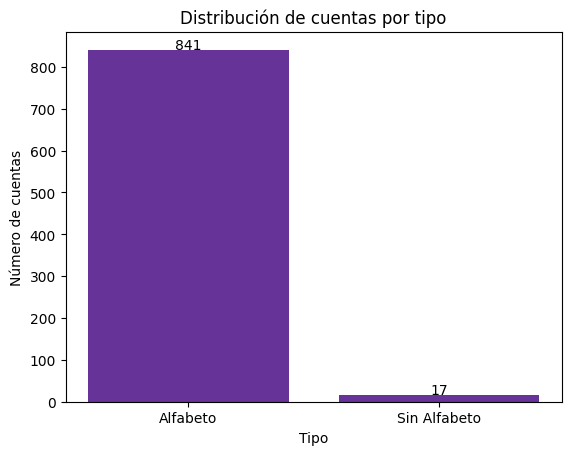

In [59]:
countA = len(Alfabeto)
countSA = len(S_Alfabeto)

etiquetas = ['Alfabeto', 'Sin Alfabeto']

# Crear los valores para el histograma
vals = [countA, countSA]

# En esta parte se crea el histograma
plt.bar(etiquetas, vals, color='rebeccapurple')
plt.xlabel('Tipo')
plt.ylabel('Número de cuentas')
plt.title('Distribución de cuentas por tipo')

# Mostramos el número exacto de cuentas en el histograma
for i, count in enumerate(vals):
    plt.text(i, count + 1, str(count), ha='center')

plt.show()


#### - ¿Cuantas cuentas de YouTube tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?
Las iniciales de mi equipo son L, E y M (Luis, Esmeralda y Mónica)

In [106]:
# Obtenemos las cuentas que inicien por E, e, M, m
em = df_Youtube[df_Youtube['Username'].str.startswith(('L','l','E','e','m', 'M'), na=False) | df_Youtube['Name'].str.startswith(('E','e','m', 'M'), na=False)]
em.shape[0]

180

Por lo tanto, son 144 cuentas que tienen como inicial E,e,M,m en username o name.

#### - Métrica que identifique las 10 cuentas mas importantes de YouTube

In [103]:
# Obtenemos los registros de diciembre para la métrica y los ordenamos ascentemente para obtener las cuentas
# más importantes, al menos por la métrica planteada que fue el conteo de subscribers.
cuentas_import = df_Youtube[df_Youtube['Month'] == 'December'].sort_values(by='Subscribers', ascending=False)
# Obtenemos el top 10 de cuentas con mayor número de seguidores en diciembre, se eligió filtrar por diciembre
# ya que es el mes de cierre y los usuarios que hayan tenido más subscriptores se consideran los más importantes
# para Youtube
top10 = cuentas_import.head(10)
# Se muestra el username y cuantos subscribers tiene esa cuenta.
print(top10[['Username', 'Subscribers']])

               Username  Subscribers
3786        MrBeast6000     97300000
3069  ✿ Kids Diana Show     96600000
3358              sabtv     68500000
3113    SmartBooksMedia     58000000
3791         movieclips     57200000
3367                yrf     46300000
3626        JuegaGerman     45900000
3794           DjWalkzz     42000000
3215   Like Nastya Show     41400000
3628          Bad Bunny     41000000


In [105]:
# Calcular la matriz de correlación
correlacion = df_Youtube.corr()

# Crear el mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)

# Ajustar los márgenes para que el mapa de correlación se muestre completo
plt.tight_layout()

# Mostrar el mapa de correlación
plt.show()


ValueError: could not convert string to float: 'MrBeast'

#### - Histograma del número de seguidores promedio por país.

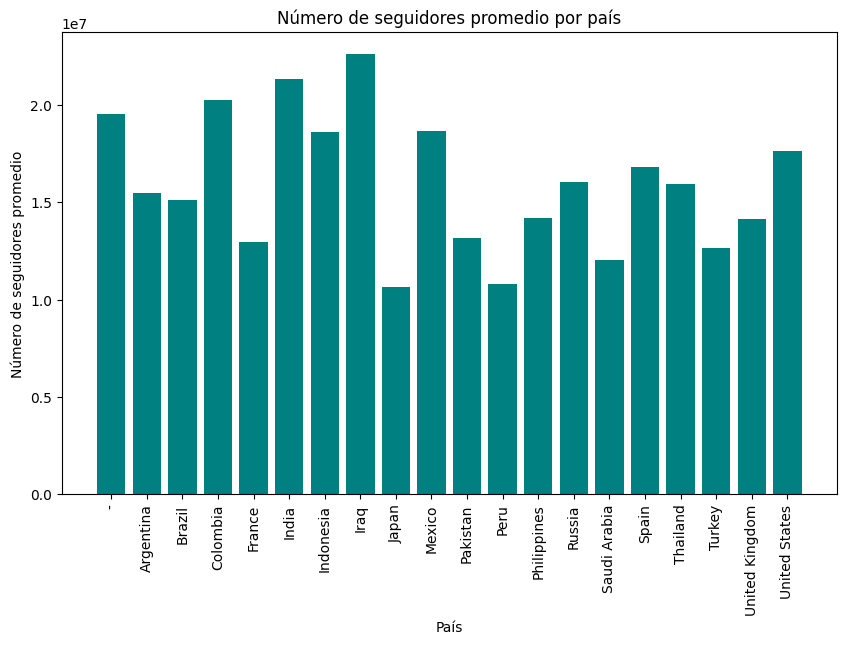

In [99]:
import matplotlib.pyplot as plt

# Obtener los países únicos
paises = df_Youtube['Country'].unique()

# Calcular el número de seguidores promedio por país
promedio_seguidores = df_Youtube.groupby('Country')['Subscribers'].mean()

plt.figure(figsize=(10, 6))
plt.bar(promedio_seguidores.index, promedio_seguidores.values, color='teal')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Número de seguidores promedio')
plt.title('Número de seguidores promedio por país')
plt.show()


#### - Cree una serie con todas las categorias existentes en todos los archivos de YouTube

In [57]:
patrones(archivos_econtrados_mes, Patron_Youtube, Youtube)
len(archivos_econtrados_sin_mes)
archivos_econtrados_sin_mes

['/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - youtube.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - instagram.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - tiktok.csv']

In [62]:
df_Youtube_s_f = pd.read_csv(archivos_econtrados_sin_mes[0])

In [66]:
categorias_por_archivo = []

# Iterar sobre cada archivo de YouTube
for archivo in archivos_econtrados_sin_mes:
    # Leer el archivo CSV
    df_Youtube_s_f = pd.read_csv(archivo)
    
    # Obtener las columnas de categoría
    categorias = df_Youtube_s_f.filter(regex=r'^[Cc]ategory[1-3]$').values.flatten()
    
    # Agregar las categorías al arreglo
    categorias_por_archivo.extend(categorias)

# Eliminar duplicados y ordenar las categorías
categorias_por_archivo = sorted(set(categorias_por_archivo))

# Crear la serie con las categorías
serie_categorias_por_archivo = pd.Series(categorias_por_archivo)

# Mostrar la serie de categorías por archivo
print(serie_categorias_por_archivo)

Series([], dtype: object)


In [69]:
import glob
import re
import pandas as pd

# Definir el patrón de búsqueda para los nombres de los archivos
patron_archivo = r'.*youtube.*\.csv$'

# Definir el patrón de búsqueda para las columnas de categoría
patron_columna = r'^[Cc]ategory_[1-3]$'

# Lista para almacenar las categorías encontradas
categorias = []

# Obtener la lista de archivos de YouTube en el directorio
archivos_youtube = glob.glob('*.csv')

# Iterar sobre cada archivo de YouTube
for archivo in archivos_youtube:
    # Verificar si el nombre del archivo cumple con el patrón de búsqueda
    if re.match(patron_archivo, archivo):
        # Leer el archivo CSV
        df = pd.read_csv(archivo)
        
        # Buscar las columnas de categoría y obtener sus valores únicos
        for columna in df.columns:
            if re.match(patron_columna, columna):
                categorias.extend(df[columna].unique())

# Eliminar duplicados y ordenar las categorías
categorias = sorted(set(categorias))

# Crear la serie con las categorías
serie_categorias = pd.Series(categorias)

# Mostrar la serie de categorías
print(serie_categorias)

for archivo in archivos_econtrados_sin_mes:
    df = pd.read_csv(archivo)
    print(f"Archivo: {archivo}")
    print(df.head())

    
    print(archivos_econtrados_sin_mes)

Series([], dtype: object)
Archivo: /home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - youtube.csv
  youtuber name                channel name       Category Subscribers   
0       tseries                    T-Series  Music & Dance      212.1M  \
1     checkgate  Cocomelon - Nursery Rhymes      Education      132.1M   
2      setindia                   SET India            NaN      130.4M   
3     PewDiePie                   PewDiePie      Animation      111.4M   
4   MrBeast6000                     MrBeast    Video games       92.5M   

  Audience Country avg views avg likes avg comments  
0            India    323.7K      9.8K          290  
1              NaN     13.8M     80.9K          NaN  
2            India     23.6K       314           21  
3    United States      1.4M     80.8K         4.6K  
4    United States     30.6M      1.7M        67.7K  
['/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuper

In [104]:
import glob
import pandas as pd
import re

# Definir el patrón de búsqueda para los nombres de los archivos
patron_archivo = r'^.*[yY][oO][uU][tT][uU][bB][eE].*$'

# Obtener la lista de archivos de YouTube en el directorio actual
archivos_youtube = glob.glob('*')

# Lista para almacenar las categorías y países encontrados
categorias = []
paises = []

# Iterar sobre cada archivo de YouTube
for archivo in archivos_youtube:
    # Leer el archivo CSV
    df = pd.read_csv(archivo)
    
    # Buscar las columnas de categoría y obtener sus valores únicos
    for columna in df.columns:
        if re.match(r'^[cC]ategory[1-3]$', columna):
            categorias.extend(df[columna].dropna().unique())
    
    # Obtener la columna de país y sus valores únicos
    if 'Country' in df.columns:
        paises.extend(df['Country'].dropna().unique())

# Eliminar duplicados y ordenar las categorías y países
categorias = sorted(set(categorias))
paises = sorted(set(paises))

# Crear la serie con las categorías y países
serie_categorias = pd.Series(categorias)
serie_paises = pd.Series(paises)

# Mostrar la serie de categorías
print("Categorías:")
print(serie_categorias)

# Mostrar la serie de países
print("Países:")
print(serie_paises)

ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['socialnetworks/', 'socialnetworks/social media influencers - instagram sep-2022.csv', 'socialnetworks/social media influencers - instagram.csv', 'socialnetworks/social media influencers - Tiktok sep 2022.csv', 'socialnetworks/social media influencers - tiktok.csv', 'socialnetworks/social media influencers - Youtube sep-2022.csv', 'socialnetworks/social media influencers - youtube.csv', 'socialnetworks/social media influencers-INSTAGRAM - -DEC 2022.csv', 'socialnetworks/social media influencers-instagram - -nov 2022.csv', 'socialnetworks/social media influencers-instagram june 2022 - june 2022.csv', 'socialnetworks/social media influencers-TIKTOK - ---DEC 2022.csv', 'socialnetworks/social media influencers-tiktok - ---nov 2022.csv', 'socialnetworks/social media influencers-tiktok june 2022 - june 2022.csv', 'socialnetworks/social media influencers-YOUTUBE - --DEC 2022.csv', 'socialnetworks/social media influencers-youtube - --nov 2022.csv', 'socialnetworks/social media influencers-youtube june 2022 - june 2022.csv']

In [107]:
df_Youtube['Country'].head(5)

3     United States
12            India
21    United States
27    United States
33            India
Name: Country, dtype: object

#### - Histograma el número de seguidores por categoría

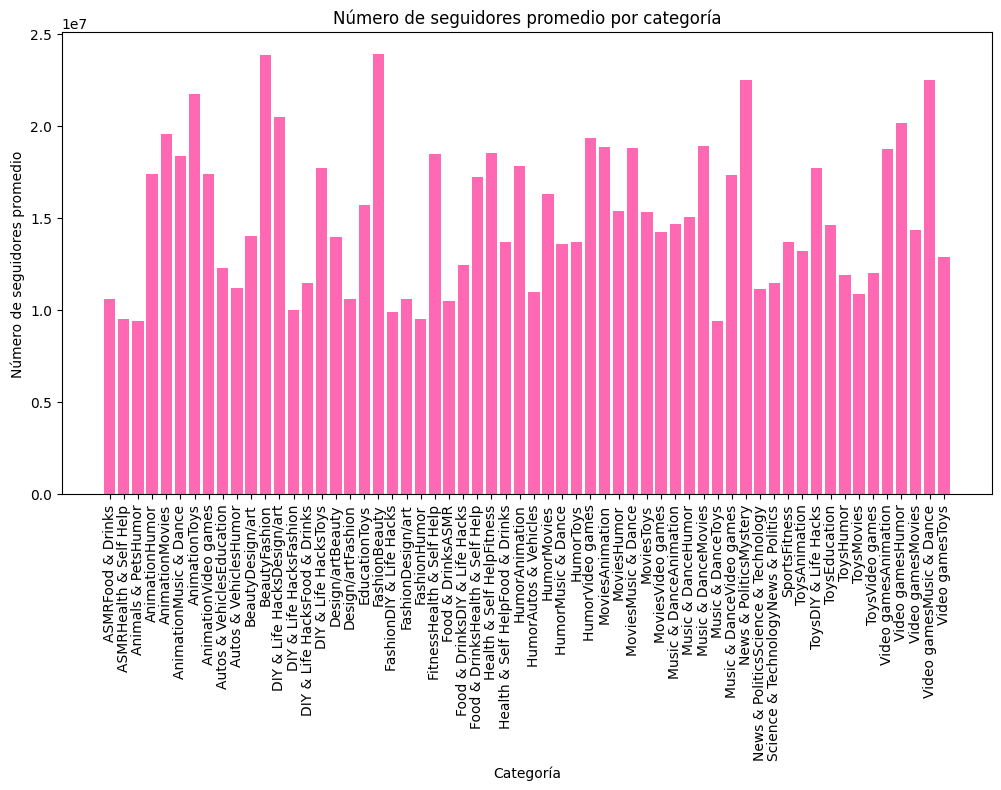

In [98]:
# Primero combinamos las columnas de categoría en una sola columna
df_Youtube['Category'] = df_Youtube['Category1'].fillna('') + df_Youtube['Category2'].fillna('')

# Agrupamos los datos por categoría y luego se obtiene el promedio de suscriptores
seguidores_por_categoria = df_Youtube.groupby('Category')['Subscribers'].mean()

plt.figure(figsize=(12, 6))
plt.bar(seguidores_por_categoria.index, seguidores_por_categoria.values, color='hotpink')
plt.xlabel('Categoría')
plt.ylabel('Número de seguidores promedio')
plt.title('Número de seguidores promedio por categoría')
plt.xticks(rotation=90)  
plt.show()

## ¿Cuales son las 5 cuentas mas importantes de las 3 redes sociales?